#### Importing Libs

In [1]:
from PySimpleML.models.ANN import NeuralNetwork
import pandas as pd
import matplotlib.pyplot as plt

#### Getting Data

In [2]:
data = pd.read_csv('/Users/msreeramulu/SWD/Python/PySimpleML/Examples/data/Houses.csv')
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.1583,735501.8070,67432.51700,21250.21377
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733070,554279.8501,733236.8844,65049.90857,20880.60040
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757


In [8]:
dataShuff = data.sample(frac=1)
trainData = data.iloc[:20000, :] #using only 10k rows out of~20000
testData = data.iloc[20000:, :]
XTrain = trainData.iloc[:, 1:]
yTrain = trainData.iloc[:, [0]]
XTest = testData.iloc[:, 1:]
yTest = testData.iloc[:, [0]]

#### Training

In [60]:
houseNN = NeuralNetwork(10, 10, task=0)
houseNN.train(XTrain, yTrain, 0.01, 10)

Done Training


#### Model Evaluation

In [ ]:
from PySimpleML.scores import R2Score
pred = houseNN.predict(XTest)
print(f'R2 Score: {R2Score(pred, yTest)}')
op = pd.concat([XTest.reset_index(drop=True), pred.reset_index(drop=True)], axis=1).sort_values(['Median_Income'])
op.head()

0.6303195907674959


,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Median_House_ValuePred
91,0.4999,43,102,19,44,13,38.07,-120.19,116915.63190,479754.9689,655515.5806,170638.2828,199328.7977,69427.618017
592,0.8928,52,662,160,520,149,39.14,-121.58,117496.31960,639220.4397,817401.7093,202506.9649,169014.9542,71772.924014
537,1.0633,18,974,317,521,317,38.54,-121.73,51123.12762,588639.6087,767815.9733,134697.3458,104952.6719,124575.216061
512,1.2292,36,435,95,285,90,38.59,-121.55,56658.29774,584989.2143,763892.0362,142700.5563,119023.7711,127392.414096
508,1.2542,42,1822,636,1372,560,38.58,-121.51,56076.14031,582233.7068,761087.5069,142400.1236,120489.8737,140970.658075


#### Plotting

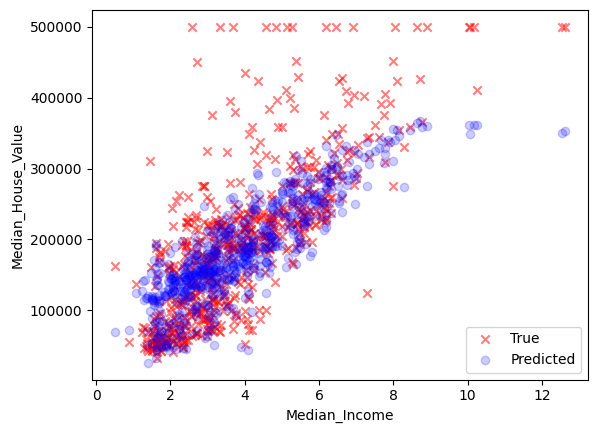

In [65]:
# plt.scatter(XTrain['Median_Income'], yTrain, c='r', alpha=0.15)
plt.scatter(XTest['Median_Income'], yTest, c='r', label='True', alpha=0.5, marker='x')
plt.scatter(op['Median_Income'], op['Median_House_ValuePred'], c='b', label='Predicted', alpha=0.2)
plt.xlabel('Median_Income')
plt.ylabel('Median_House_Value')
plt.legend()
plt.show()